# Task 1: Sentiment Analysis Overview
Conduct a high-level analysis of sentiment distribution in the dataset and explore trends over time.

## **1.0 Overview**

The notebook aims to perform sentiment analysis on an Amazon dataset, classifying reviews as positive or negative.

The analysis includes exploring sentiment distribution.

In [25]:
import zipfile
import tarfile

import pandas as pd
import numpy as np


from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
col_names = ['class', 'review_title', 'review_text']
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Prembly/Datasets/train.csv', names=col_names)
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Prembly/Datasets/test.csv', names=col_names)

train.shape, test.shape

((3600000, 3), (400000, 3))

## **1.1 Data Description**

This dataset contains two features and the target column.

1. class: positive or negative (2, 1)

2. title_review: review title, which contains the summary of the review_text.

3. review_text: actual review, which could be positive or negative.

In [27]:
train.head()

class                                       review_title  \
0      2                     Stuning even for the non-gamer   
1      2              The best soundtrack ever to anything.   
2      2                                           Amazing!   
3      2                               Excellent Soundtrack   
4      2  Remember, Pull Your Jaw Off The Floor After He...   

                                         review_text  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music of all ti...  
3  I truly like this soundtrack and I enjoy video...  
4  If you've played the game, you know how divine...

# 2.0 Data Preparation

Train and Test data have some missing values in the same feature.

It could be because the customer left them blank.



In [28]:
print(train.isna().sum())

class            0
review_title    77
review_text      0
dtype: int64


In [29]:
print(test.isna().sum())

class            0
review_title    10
review_text      0
dtype: int64


In [30]:
train.loc[train['review_title'].isna()]
test.loc[test['review_title'].isna()]

class review_title                                        review_text
2703        1          NaN  Who is Joe Nickell? What are his qualification...
120213      2          NaN  This CD is good. A lot of the songs on here wa...
132078      1          NaN  I don't see the point in owning this DVD, anyb...
169616      1          NaN  It doesn't work at all. Just turn on either mi...
190081      1          NaN  I can't give you a review since the three DVDs...
200606      1          NaN  Some good rocking moments here and there (espe...
216223      2          NaN  The Moon Under the Water has one of the most d...
227743      2          NaN  Very interesting and good read. Very well writ...
235814      1          NaN  I ordered a 12 foot cable and I received a 10 ...
339814      1          NaN  Just wanted to vote the one star to bring the ...

In [31]:
train['review_title'] = train['review_title'].fillna('')
test['review_title'] = test['review_title'].fillna('')

In [32]:
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


# 3.0 Description of Data

Sentiment analysis determines the tone of a review, classifying it as either positive or negative based on the provided dataset. With the use of Natural Language Processing (NLP) and Machine Learning Models, texts can be categorized in postive or negative.

This approach is very useful, especially when handling a vast number of reviews, covering various products, specific topics, and more.


## 3.1 Class

This feature contains a mixture of positive(2's) and negative(1's) sentiment's.
Users highlight positive aspects such as the product's impressive performance, and reliable functionality. Conversely, negative sentiments are expressed regarding certain drawbacks, including issues with durability and occasional technical glitches.

The words used can be found in Task 2 for better understanding.

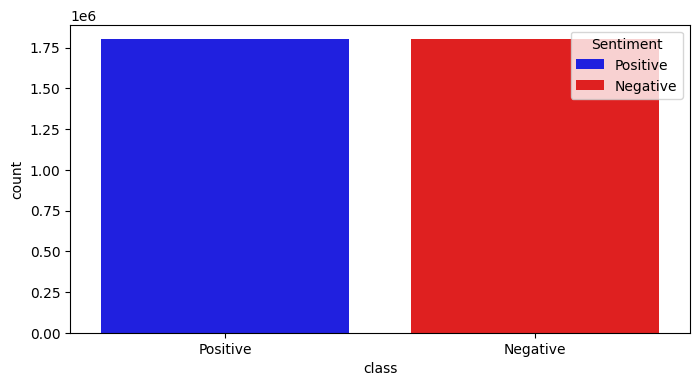

In [33]:
plt.figure(figsize=(8, 4))
colours = ['blue', 'red']
sns.countplot(x='class', data=train, palette=colours, hue='class')
plt.xticks([0, 1], ['Positive', 'Negative'])
plt.legend(title='Sentiment', labels=['Positive', 'Negative'])
plt.show()

## 3.2 Title Review

In this dataset, the inclusion of review titles allows for a comprehensive analysis of user sentiments. Review titles provide a concise summary of user's opinions, reflecting both positive and negative sentiments.
It allows for a quick overview of the review.

In [34]:
np.mean(train['review_title'].str.split().str.len())

4.3138625

In [35]:
word_len_postive = train[train['class']==2]['review_title'].str.split().apply(len)
word_len_non_negative = train[train['class']==1]['review_title'].str.split().apply(len)

fig = make_subplots(rows=1, cols=2, subplot_titles=("Positive Review", "Negative Review"))
fig.add_trace(
    go.Histogram(x=word_len_postive,marker_line=dict(color='black'),
                 marker_line_width=1.2),row=1, col=1
).add_trace(
    go.Histogram(x=word_len_non_negative,marker_line=dict(color='black'),
                 marker_line_width=1.2),row=1, col=2
).update_layout(title_text="Length of words in words",
                title_x=0.5,showlegend=False).show()

## 3.3 Text Review

The feature has lots of text from Amazon customers, showing what people think about different products. These reviews share different opinions, talking about both positive and negative, giving us useful information to understand what customers like or dislike about various products.

This feature contains a large tokens of words, trying to find average word per observation would make the notebook go out of memory.

In [36]:
train['review_text'].iloc[5]

"I am quite sure any of you actually taking the time to read this have played the game at least once, and heard at least a few of the tracks here. And whether you were aware of it or not, Mitsuda's music contributed greatly to the mood of every single minute of the whole game.Composed of 3 CDs and quite a few songs (I haven't an exact count), all of which are heart-rendering and impressively remarkable, this soundtrack is one I assure you you will not forget. It has everything for every listener -- from fast-paced and energetic (Dancing the Tokage or Termina Home), to slower and more haunting (Dragon God), to purely beautifully composed (Time's Scar), to even some fantastic vocals (Radical Dreamers).This is one of the best videogame soundtracks out there, and surely Mitsuda's best ever. ^_^"

reference:
1. The arrangement of this notebook was based on this repo. [Link](https://github.com/Oreolorun/Customer-Churn-Banking-/blob/main/Churn_Modelling_(Banking).ipynb)



2. Length of word visualization. [Link](https://www.kaggle.com/code/mohitnirgulkar/disaster-tweets-classification-using-ml)